Старые данные

In [1]:
import glob

files_wm = sorted(glob.glob('/Users/daniilvlasenko/Programming/HCP_data_v1/correlation_graphs/WM/*'))
wm_rl_0 = files_wm[2::4][70:]
wm_rl_2 = files_wm[3::4][70:]

import pandas
import numpy
from igraph import Graph

A_mean_wm_rl_0 = []
A_mean_wm_rl_2 = []

for file in wm_rl_0:
    edges = pandas.read_csv(file)
    g = Graph.DataFrame(edges, directed=False)
    A = numpy.array(g.get_adjacency(attribute="edge_weight").data)[1:, 1:]
    A_mean_wm_rl_0.append(A)
A_mean_wm_rl_0 = numpy.mean(A_mean_wm_rl_0, axis=0)
    
for file in wm_rl_2:
    edges = pandas.read_csv(file)
    g = Graph.DataFrame(edges, directed=False)
    A = numpy.array(g.get_adjacency(attribute="edge_weight").data)[1:, 1:]
    A_mean_wm_rl_2.append(A)
A_mean_wm_rl_2 = numpy.mean(A_mean_wm_rl_2, axis=0)

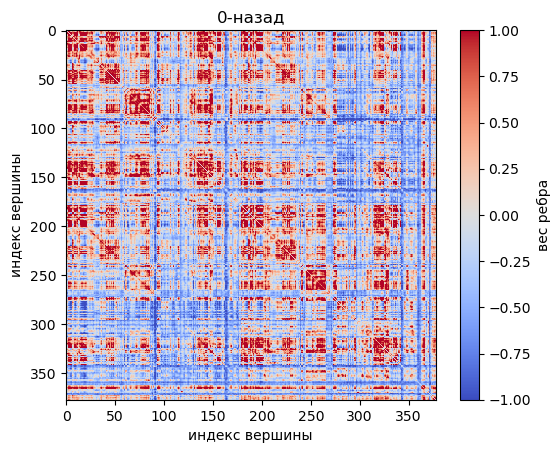

In [2]:
import matplotlib.pyplot as plt

plt.imshow(A_mean_wm_rl_0, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() # отображаем цветовую шкалу
plt.colorbar(label="вес ребра")
plt.title('0-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/0-back task.pdf', format='pdf')
# plt.savefig('img/WM 0-назад.pdf', format='pdf')
plt.show()

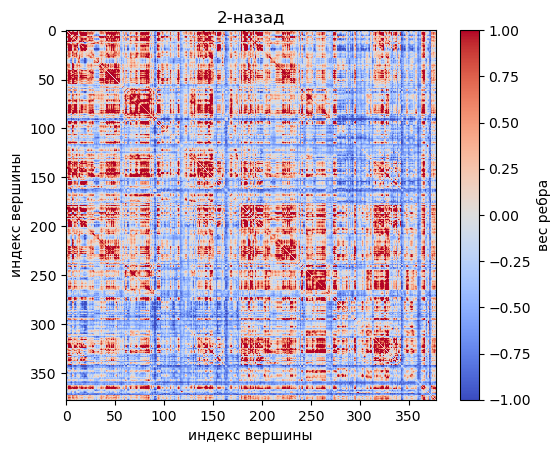

In [5]:
plt.imshow(A_mean_wm_rl_2, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() 
plt.colorbar(label="вес ребра")  # отображаем цветовую шкалу
plt.title('2-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/2-back task.pdf', format='pdf')
# plt.savefig('img/WM 2-назад.pdf', format='pdf')
plt.show()

новые данные

In [58]:
import glob

files_wm = sorted(glob.glob('/Users/daniilvlasenko/Programming/HSE_HCP_fMRI_ensemble_graphs/tmp/train_to_test/*'))
wm_rl_0 = files_wm[::2]
wm_rl_2 = files_wm[1::2]

import numpy
A_mean_wm_rl_0 = []
A_mean_wm_rl_2 = []

for file in wm_rl_0:
    edges = numpy.load(file)
    A_mean_wm_rl_0.append(edges)
A_mean_wm_rl_0 = numpy.mean(A_mean_wm_rl_0, axis=0)
    
for file in wm_rl_2:
    edges = numpy.load(file)
    A_mean_wm_rl_2.append(edges)
A_mean_wm_rl_2 = numpy.mean(A_mean_wm_rl_2, axis=0)

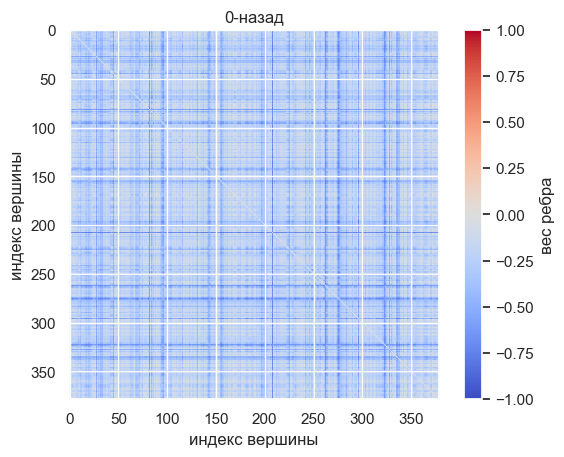

In [59]:
import matplotlib.pyplot as plt

plt.imshow(A_mean_wm_rl_0, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() # отображаем цветовую шкалу
plt.colorbar(label="вес ребра")
plt.title('0-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/0-back task.pdf', format='pdf')
# plt.savefig('img/WM 0-назад.pdf', format='pdf')
plt.show()

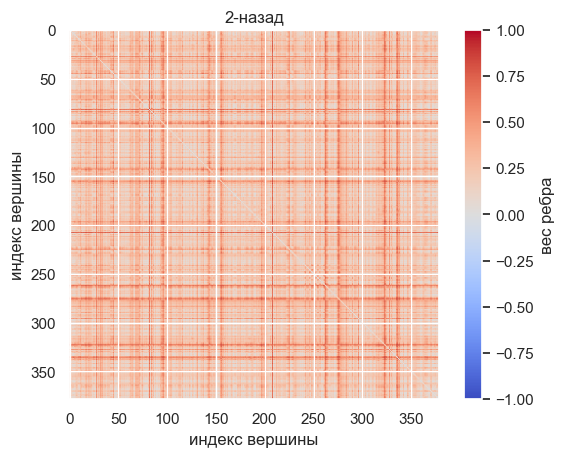

In [60]:
plt.imshow(A_mean_wm_rl_2, cmap='coolwarm', vmin=-1, vmax=1)
# plt.colorbar() 
plt.colorbar(label="вес ребра")  # отображаем цветовую шкалу
plt.title('2-назад')
plt.xlabel('индекс вершины')
plt.ylabel('индекс вершины')

# plt.savefig('img/2-back task.pdf', format='pdf')
# plt.savefig('img/WM 2-назад.pdf', format='pdf')
plt.show()

Точность классификации на основе среднего веса ребра

In [68]:
import paths
import glob
import numpy

list_folders_mean_test = [paths.folders_mean_ensemble_edges_test_wm, paths.folders_mean_ensemble_edges_test_gambling, 
                    paths.folders_mean_ensemble_edges_test_motor, paths.folders_mean_ensemble_edges_test_language, 
                    paths.folders_mean_ensemble_edges_test_social, paths.folders_mean_ensemble_edges_test_relational, 
                    paths.folders_mean_ensemble_edges_test_emotion]
list_folders_pca_test = [paths.folders_pca_ensemble_edges_test_wm, paths.folders_pca_ensemble_edges_test_gambling, 
                    paths.folders_pca_ensemble_edges_test_motor, paths.folders_pca_ensemble_edges_test_language, 
                    paths.folders_pca_ensemble_edges_test_social, paths.folders_pca_ensemble_edges_test_relational, 
                    paths.folders_pca_ensemble_edges_test_emotion]

In [69]:
def classification_mean_edge(folders_mean_test, folders_pca_test):
    for representation in [folders_mean_test, folders_pca_test]:
        accuracy = []
        for fold, folder in enumerate(representation): 
            files = sorted(glob.glob(f'{folder}/*'))
            files_0 = files[::2]
            files_1 = files[1::2]
            
            import numpy
            A_mean_0 = []
            A_mean_1 = []
            
            for file in files_0:
                edges = numpy.load(file)
                A_mean_0.append(edges)
            A_mean_0 = numpy.mean(A_mean_0, axis=(1, 2))
                
            for file in files_1:
                edges = numpy.load(file)
                A_mean_1.append(edges)
            A_mean_1 = numpy.mean(A_mean_1, axis=(1, 2))
            
            if "WM" in folder or "MOTOR" in folder:
                accuracy.append((sum(A_mean_0 < 0) + sum(A_mean_1 > 0)) / (len(A_mean_0) + len(A_mean_1)))
            else:
                accuracy.append((sum(A_mean_0 > 0) + sum(A_mean_1 < 0)) / (len(A_mean_0) + len(A_mean_1)))
        
        print(f'{representation[0].split('/')[-1]} {representation[0].split('/')[3]}: '
              f'mean accuracy {numpy.mean(accuracy) * 100}, std of accuracy {numpy.std(accuracy) * 100}')
    print()

In [70]:
for folders_mean_test, folders_pca_test in zip(list_folders_mean_test, list_folders_pca_test):
    classification_mean_edge(folders_mean_test, folders_pca_test)

WM mean: mean accuracy 97.846008502598, std of accuracy 1.2536104706462845
WM pca: mean accuracy 96.98748228625412, std of accuracy 0.6640604837759608

GAMBLING mean: mean accuracy 87.00342465753425, std of accuracy 1.7592256783656355
GAMBLING pca: mean accuracy 86.14489844119035, std of accuracy 0.7393298222518868

MOTOR mean: mean accuracy 88.98677373641945, std of accuracy 0.8459351784251273
MOTOR pca: mean accuracy 88.81376948512045, std of accuracy 0.5409638008260599

LANGUAGE mean: mean accuracy 99.13911195087387, std of accuracy 0.38606214072455247
LANGUAGE pca: mean accuracy 98.45063769485121, std of accuracy 0.7906250672463477

SOCIAL mean: mean accuracy 97.4179263108172, std of accuracy 0.6228332062518184
SOCIAL pca: mean accuracy 96.72886159659897, std of accuracy 0.5761468269534601

RELATIONAL mean: mean accuracy 94.41072272083137, std of accuracy 1.708744395648996
RELATIONAL pca: mean accuracy 94.23830892772791, std of accuracy 1.692702256198992

EMOTION mean: mean accurac

Точность классификации на основе степени вершины с помощью логистической регрессии.

In [116]:
from sklearn.linear_model import LogisticRegression

list_folders_mean_train = [paths.folders_mean_ensemble_edges_train_wm, paths.folders_mean_ensemble_edges_train_gambling, 
                    paths.folders_mean_ensemble_edges_train_motor, paths.folders_mean_ensemble_edges_train_language, 
                    paths.folders_mean_ensemble_edges_train_social, paths.folders_mean_ensemble_edges_train_relational, 
                    paths.folders_mean_ensemble_edges_train_emotion]
list_folders_pca_train = [paths.folders_pca_ensemble_edges_train_wm, paths.folders_pca_ensemble_edges_train_gambling, 
                    paths.folders_pca_ensemble_edges_train_motor, paths.folders_pca_ensemble_edges_train_language, 
                    paths.folders_pca_ensemble_edges_train_social, paths.folders_pca_ensemble_edges_train_relational, 
                    paths.folders_pca_ensemble_edges_train_emotion]

def classification_lr(folders_mean_train, folders_mean_test, folders_pca_train, folders_pca_test):
    # Сначала mean, затем pca
    for representation in [(folders_mean_train, folders_mean_test), (folders_pca_train, folders_pca_test)]:
        accuracy = []
        for fold, (folder_train, folder_test) in enumerate(zip(representation[0], representation[1])): 
            # Обучение модели
            files_train = sorted(glob.glob(f'{folder_train[0]}/*') + glob.glob(f'{folder_train[1]}/*') + glob.glob(f'{folder_train[2]}/*'))
            files_train_0 = files_train[::2]
            files_train_1 = files_train[1::2]
            
            A_mean_0 = []
            for file in files_train_0:
                edges = numpy.load(file)
                A_mean_0.append(edges)
            A_mean_0 = numpy.mean(A_mean_0, axis=2)
            
            A_mean_1 = []  
            for file in files_train_1:
                edges = numpy.load(file)
                A_mean_1.append(edges)
            A_mean_1 = numpy.mean(A_mean_1, axis=2)
            
            X_train = numpy.vstack((A_mean_0, A_mean_1))
            y_train = numpy.hstack((numpy.full(A_mean_0.shape[0], 0), numpy.full(A_mean_1.shape[0], 1)))
            model = LogisticRegression(random_state=0)
            model.fit(X_train, y_train)
            
            # Тестирование модели
            files_test = sorted(glob.glob(f'{folder_test}/*'))
            files_test_0 = files_test[::2]
            files_test_1 = files_test[1::2]
            
            A_mean_0 = []
            for file in files_test_0:
                edges = numpy.load(file)
                A_mean_0.append(edges)
            A_mean_0 = numpy.mean(A_mean_0, axis=2)
                
            A_mean_1 = []
            for file in files_test_1:
                edges = numpy.load(file)
                A_mean_1.append(edges)
            A_mean_1 = numpy.mean(A_mean_1, axis=2)
            
            X_test = numpy.vstack((A_mean_0, A_mean_1))
            y_true = numpy.hstack((numpy.full(A_mean_0.shape[0], 0), numpy.full(A_mean_1.shape[0], 1)))
            y_pred = model.predict(X_test)
            accuracy.append(sum(y_true == y_pred) / y_true.shape[0])
        
        print(f'{representation[1][0].split('/')[-1]} {representation[1][0].split('/')[3]}: '
              f'mean accuracy {numpy.mean(accuracy) * 100}, std of accuracy {numpy.std(accuracy) * 100}')
    print()

classification_lr(list_folders_mean_train[0], list_folders_mean_test[0], list_folders_pca_train[0], list_folders_pca_test[0])

KeyboardInterrupt: 

In [113]:
for folders_mean_train, folders_mean_test, folders_pca_train, folders_pca_test in zip(list_folders_mean_train, list_folders_mean_test, list_folders_pca_train, list_folders_pca_test):
    classification_lr(folders_mean_train, folders_mean_test, folders_pca_train, folders_pca_test)

WM mean: mean accuracy 98.19083608880491, std of accuracy 0.8592917650901543
WM pca: mean accuracy 97.41733585262163, std of accuracy 0.5750602079161597

GAMBLING mean: mean accuracy 97.07309872461029, std of accuracy 0.3911004503091311
GAMBLING pca: mean accuracy 96.7282711384034, std of accuracy 0.715910778449704

MOTOR mean: mean accuracy 99.57014643363249, std of accuracy 0.28485309198155534
MOTOR pca: mean accuracy 98.5386159659896, std of accuracy 0.9519993578025783

LANGUAGE mean: mean accuracy 99.74137931034484, std of accuracy 0.2859159302030523
LANGUAGE pca: mean accuracy 99.31211620217287, std of accuracy 0.4208881941462677

SOCIAL mean: mean accuracy 99.48334907888521, std of accuracy 0.17300626650295584
SOCIAL pca: mean accuracy 99.39714218233348, std of accuracy 0.2864513474885659

RELATIONAL mean: mean accuracy 98.10699102503541, std of accuracy 0.516095591959473
RELATIONAL pca: mean accuracy 97.67772791686349, std of accuracy 1.200419228092477

EMOTION mean: mean accura

In [110]:
from sklearn.linear_model import LogisticRegression

list_folders_mean_train = [paths.folders_mean_ensemble_edges_train_wm, paths.folders_mean_ensemble_edges_train_gambling, 
                    paths.folders_mean_ensemble_edges_train_motor, paths.folders_mean_ensemble_edges_train_language, 
                    paths.folders_mean_ensemble_edges_train_social, paths.folders_mean_ensemble_edges_train_relational, 
                    paths.folders_mean_ensemble_edges_train_emotion]
list_folders_pca_train = [paths.folders_pca_ensemble_edges_train_wm, paths.folders_pca_ensemble_edges_train_gambling, 
                    paths.folders_pca_ensemble_edges_train_motor, paths.folders_pca_ensemble_edges_train_language, 
                    paths.folders_pca_ensemble_edges_train_social, paths.folders_pca_ensemble_edges_train_relational, 
                    paths.folders_pca_ensemble_edges_train_emotion]

folders_mean_train, folders_mean_test, folders_pca_train, folders_pca_test = list_folders_mean_train[0], list_folders_mean_test[0], list_folders_pca_train[0], list_folders_pca_test[0]
# Сначала mean, затем pca

representation = (folders_mean_train, folders_mean_test)
accuracy = []
folder_train, folder_test = representation[0][0], representation[1][0] 
# Обучение модели
files_train = sorted(glob.glob(f'{folder_train[0]}/*') + glob.glob(f'{folder_train[1]}/*') + glob.glob(f'{folder_train[2]}/*'))
files_train_0 = files_train[::2]
files_train_1 = files_train[1::2]

A_mean_0 = []
for file in files_train_0:
    edges = numpy.load(file)
    A_mean_0.append(edges)
A_mean_0 = numpy.mean(A_mean_0, axis=2)

A_mean_1 = []  
for file in files_train_1:
    edges = numpy.load(file)
    A_mean_1.append(edges)
A_mean_1 = numpy.mean(A_mean_1, axis=2)

X_train = numpy.vstack((A_mean_0, A_mean_1))
y_train = numpy.hstack((numpy.full(A_mean_0.shape[0], 0), numpy.full(A_mean_1.shape[0], 1)))
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# Тестирование модели
files_test = sorted(glob.glob(f'{folder_test}/*'))
files_test_0 = files_test[::2]
files_test_1 = files_test[1::2]

A_mean_0 = []
for file in files_test_0:
    edges = numpy.load(file)
    A_mean_0.append(edges)
A_mean_0 = numpy.mean(A_mean_0, axis=2)
    
A_mean_1 = []
for file in files_test_1:
    edges = numpy.load(file)
    A_mean_1.append(edges)
A_mean_1 = numpy.mean(A_mean_1, axis=2)

X_test = numpy.vstack((A_mean_0, A_mean_1))
y_true = numpy.hstack((numpy.full(A_mean_0.shape[0], 0), numpy.full(A_mean_1.shape[0], 1)))
y_pred = model.predict(X_test)
accuracy.append(sum(y_true == y_pred) / y_true.shape[0])

print(f'{representation[1][0].split('/')[-1]} {representation[1][0].split('/')[3]}: '
  f'mean accuracy {numpy.mean(accuracy) * 100}, std of accuracy {numpy.std(accuracy) * 100}')
print()

KeyboardInterrupt: 